In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('features.csv', sep = '\t')

In [23]:
# Make one-hot encoded columns
categories = ['Funding','Auth_country', 'Pub_country']
columns = []
for category in categories:
    cat_df = pd.get_dummies(df[category], prefix=category, dtype=int)
    columns.append(cat_df)
cat_df = pd.concat(columns, axis = 1)

In [25]:
#Make full dataframe
num_df = df[['Year Published', 'Cited Reference Count', 'Page Count', 'num_auth', 'num_words']]
X = pd.concat([num_df, cat_df], axis = 1)

In [34]:
# Split for train/test
y = df['JIF']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Build linear regression model
model_one_hot = LinearRegression().fit(X_train, y_train)

In [77]:
y_pred = model_one_hot.predict(X_test)
pred_df = pd.DataFrame({'Observed':y_test, 'Predicted':y_pred})
print(len(pred_df))
pred_df = pred_df.drop(pred_df[pred_df['Predicted']>15].index, axis =0)
pred_df = pred_df.drop(pred_df[pred_df['Predicted']<-3].index, axis =0)

1363


In [78]:
print(len(pred_df))

1351


(0.0, 15.0)

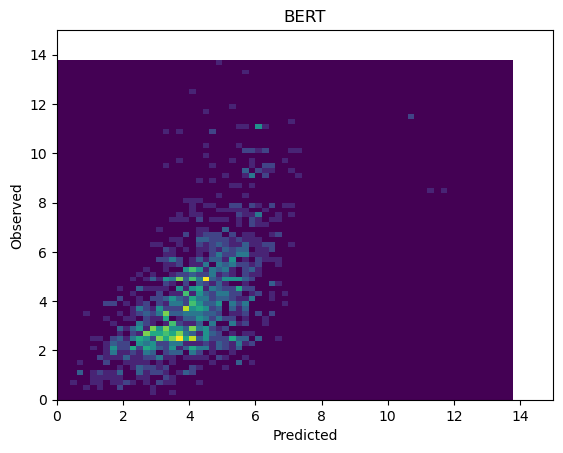

In [83]:

# Evaluate model on the test set
fig, ax = plt.subplots()
ax.hist2d(pred_df['Predicted'], pred_df['Observed'] , bins=(np.arange(0, 14, 0.2), np.arange(0, 14, 0.2)))
ax.set_title('BERT')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
ax.set_ylim(0,15)
ax.set_xlim(0,15)

In [80]:
np.corrcoef(pred_df['Predicted'], pred_df['Observed'])

array([[1.        , 0.41670649],
       [0.41670649, 1.        ]])

<Axes: >

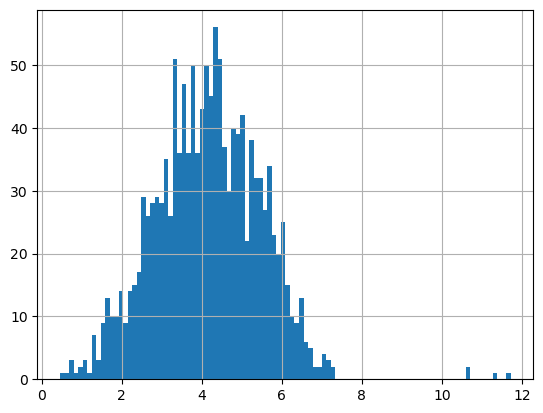

In [81]:
pred_df['Predicted'].hist(bins = 100)

In [54]:
test_df = pd.concat([X_test, pred_df], axis = 1)

In [55]:
test_df[test_df['Predicted']>100]

,Year Published,Cited Reference Count,Page Count,num_auth,num_words,Funding_False,Funding_True,Auth_country_AA,Auth_country_Algeria,Auth_country_Argentina,...,Pub_country_NEW ZEALAND,Pub_country_Netherlands,Pub_country_Poland,Pub_country_Russia,Pub_country_Spain,Pub_country_Switzerland,Pub_country_UK,Pub_country_USA,Observed,Predicted
350,2022,33,12,10,202,0,1,0,0,0,...,0,0,0,0,0,0,0,1,7.400,3.121799e+08
4530,2020,61,9,10,123,0,1,0,0,0,...,0,0,0,0,0,1,0,0,4.677,8.401953e+06
239,2019,25,7,10,236,0,1,0,0,0,...,0,0,0,0,0,0,0,1,7.887,3.121799e+08
790,2002,42,12,6,130,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1.014,4.423819e+09
3297,2022,45,12,10,396,0,1,0,0,0,...,0,0,0,0,0,0,0,1,4.900,3.121799e+08
1739,2003,30,7,6,239,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.092,2.650644e+08
293,2008,25,11,5,166,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.329,2.650644e+08
324,2016,44,8,5,157,0,1,0,0,0,...,0,0,0,0,0,0,0,1,3.466,3.792338e+06
